AllState, a personal insurance company in the United States, is interested in leveraging data science to predict the severity and the cost of insurance claims post an unforeseen event.

This ensemble machine learning project will help you understand the best practices followed in approaching a data analytics problem through python language focusing on using data science packages. We will predict how severe insurance claims will be for All State. We accomplish this using ensemble machine learning algorithms.

<ul>
<li>Business problem</li>
<li>Dataset overview</li>
<li>Exploratory data analysis</li>
<li>Data cleaning and Pre-Processing</li>
<li>Outlier treatment</li>
<li>Feature selection techniques</li>
<li>Machine learning models</li>
<li>Hyperparameter tuning</li>
<li>Model validation</li>
<li>Deployment using Flask API</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
## regular expression
import re
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import math
import pickle

In [2]:
train_data=pd.read_csv("/users/arissa/Desktop/dataset/train.csv")

In [3]:
train_data

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,587620,A,B,A,A,A,A,A,A,B,...,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216,1198.62
188314,587624,A,A,A,A,A,B,A,A,A,...,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872,1108.34
188315,587630,A,B,A,A,A,A,A,B,B,...,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888,5762.64
188316,587632,A,B,A,A,A,A,A,A,B,...,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707,1562.87


In [4]:
train_data.shape

(188318, 132)

In [5]:
# dependent variable
train_data['loss']

0         2213.18
1         1283.60
2         3005.09
3          939.85
4         2763.85
           ...   
188313    1198.62
188314    1108.34
188315    5762.64
188316    1562.87
188317    4751.72
Name: loss, Length: 188318, dtype: float64

In [6]:
# print all column names 
column_names=np.array(train_data.columns)
print(column_names)

['id' 'cat1' 'cat2' 'cat3' 'cat4' 'cat5' 'cat6' 'cat7' 'cat8' 'cat9'
 'cat10' 'cat11' 'cat12' 'cat13' 'cat14' 'cat15' 'cat16' 'cat17' 'cat18'
 'cat19' 'cat20' 'cat21' 'cat22' 'cat23' 'cat24' 'cat25' 'cat26' 'cat27'
 'cat28' 'cat29' 'cat30' 'cat31' 'cat32' 'cat33' 'cat34' 'cat35' 'cat36'
 'cat37' 'cat38' 'cat39' 'cat40' 'cat41' 'cat42' 'cat43' 'cat44' 'cat45'
 'cat46' 'cat47' 'cat48' 'cat49' 'cat50' 'cat51' 'cat52' 'cat53' 'cat54'
 'cat55' 'cat56' 'cat57' 'cat58' 'cat59' 'cat60' 'cat61' 'cat62' 'cat63'
 'cat64' 'cat65' 'cat66' 'cat67' 'cat68' 'cat69' 'cat70' 'cat71' 'cat72'
 'cat73' 'cat74' 'cat75' 'cat76' 'cat77' 'cat78' 'cat79' 'cat80' 'cat81'
 'cat82' 'cat83' 'cat84' 'cat85' 'cat86' 'cat87' 'cat88' 'cat89' 'cat90'
 'cat91' 'cat92' 'cat93' 'cat94' 'cat95' 'cat96' 'cat97' 'cat98' 'cat99'
 'cat100' 'cat101' 'cat102' 'cat103' 'cat104' 'cat105' 'cat106' 'cat107'
 'cat108' 'cat109' 'cat110' 'cat111' 'cat112' 'cat113' 'cat114' 'cat115'
 'cat116' 'cont1' 'cont2' 'cont3' 'cont4' 'cont5' 'cont

In [7]:
column_datatypes=train_data.dtypes
column_datatypes

id          int64
cat1       object
cat2       object
cat3       object
cat4       object
           ...   
cont11    float64
cont12    float64
cont13    float64
cont14    float64
loss      float64
Length: 132, dtype: object

###### Identify the categorical and numerical columns to check the data distribution and 5 point summary


In [8]:

categorical_columns=list(column_datatypes[column_datatypes=="object"].index.values)
categorical_columns

['cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cat10',
 'cat11',
 'cat12',
 'cat13',
 'cat14',
 'cat15',
 'cat16',
 'cat17',
 'cat18',
 'cat19',
 'cat20',
 'cat21',
 'cat22',
 'cat23',
 'cat24',
 'cat25',
 'cat26',
 'cat27',
 'cat28',
 'cat29',
 'cat30',
 'cat31',
 'cat32',
 'cat33',
 'cat34',
 'cat35',
 'cat36',
 'cat37',
 'cat38',
 'cat39',
 'cat40',
 'cat41',
 'cat42',
 'cat43',
 'cat44',
 'cat45',
 'cat46',
 'cat47',
 'cat48',
 'cat49',
 'cat50',
 'cat51',
 'cat52',
 'cat53',
 'cat54',
 'cat55',
 'cat56',
 'cat57',
 'cat58',
 'cat59',
 'cat60',
 'cat61',
 'cat62',
 'cat63',
 'cat64',
 'cat65',
 'cat66',
 'cat67',
 'cat68',
 'cat69',
 'cat70',
 'cat71',
 'cat72',
 'cat73',
 'cat74',
 'cat75',
 'cat76',
 'cat77',
 'cat78',
 'cat79',
 'cat80',
 'cat81',
 'cat82',
 'cat83',
 'cat84',
 'cat85',
 'cat86',
 'cat87',
 'cat88',
 'cat89',
 'cat90',
 'cat91',
 'cat92',
 'cat93',
 'cat94',
 'cat95',
 'cat96',
 'cat97',
 'cat98',
 'cat99',
 'cat100',
 'cat101

In [9]:
continuous_columns = list(column_datatypes[column_datatypes=="float64"].index.values)
continuous_columns

['cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13',
 'cont14',
 'loss']

In [10]:
# it's a list, and you need to remove
continuous_columns.remove('loss')

In [11]:
continuous_columns

['cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13',
 'cont14']

## EDA

In [12]:
##### check the distribution of categorical variables

In [13]:
# count variable frequencies 

for cat_column in categorical_columns:
    categorical_column_distribution=train_data[cat_column].value_counts()
    print(categorical_column_distribution)

A    141550
B     46768
Name: cat1, dtype: int64
A    106721
B     81597
Name: cat2, dtype: int64
A    177993
B     10325
Name: cat3, dtype: int64
A    128395
B     59923
Name: cat4, dtype: int64
A    123737
B     64581
Name: cat5, dtype: int64
A    131693
B     56625
Name: cat6, dtype: int64
A    183744
B      4574
Name: cat7, dtype: int64
A    177274
B     11044
Name: cat8, dtype: int64
A    113122
B     75196
Name: cat9, dtype: int64
A    160213
B     28105
Name: cat10, dtype: int64
A    168186
B     20132
Name: cat11, dtype: int64
A    159825
B     28493
Name: cat12, dtype: int64
A    168851
B     19467
Name: cat13, dtype: int64
A    186041
B      2277
Name: cat14, dtype: int64
A    188284
B        34
Name: cat15, dtype: int64
A    181843
B      6475
Name: cat16, dtype: int64
A    187009
B      1309
Name: cat17, dtype: int64
A    187331
B       987
Name: cat18, dtype: int64
A    186510
B      1808
Name: cat19, dtype: int64
A    188114
B       204
Name: cat20, dtype: int64
A    1879

In [14]:
for n in continuous_columns:
    print(train_data[n].mean())

0.49386136456420987
0.507188356179888
0.49891845072125063
0.4918123025893598
0.48742772878311985
0.4909445337355038
0.4849702050680532
0.4864373158700422
0.48550631989515086
0.4980658504230596
0.4935110085548004
0.4931504256257928
0.4931376158360079
0.49571701797489537


##### check the distribution of continuous variables


In [15]:
train_data[continuous_columns].describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848


#### Data cleaning and pre-processing

In [16]:
missing_values=train_data.isna().sum()
np.max(missing_values)

0

##### Section on handling outliers in the dataset


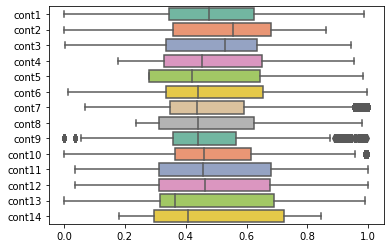

In [17]:
# boxplot is a good way to detect outliers

ax = sns.boxplot(data=train_data[continuous_columns], orient="h", palette="Set2")

In [18]:
columns_with_outlier = ['cont7','cont9','cont10']

In [19]:
class Data_preprocessing:
    def __init__(self,train_data):
        self.train_data = train_data
    def outlier_treatment(self, Q1,Q3,IQR,columns_with_outlier,action):
        if action=="median":
            for i in range(len(columns_with_outlier)):
                column_name = columns_with_outlier[i]
                meadian_outlier = np.median(self.train_data[column_name])
                self.train_data.loc[self.train_data[((self.train_data[column_name]<(Q1[column_name]-(1.5*IQR[column_name])))|(self.train_data[column_name]>(Q3[column_name]+(1.5*IQR[column_name]))))].index,column_name]=meadian_outlier
        if action=="mean":
            for i in range(len(columns_with_outlier)):
                column_name = columns_with_outlier[i]
                mean_outlier = np.mean(self.train_data[column_name])
                self.train_data.loc[self.train_data[((self.train_data[column_name]<(Q1[column_name]-(1.5*IQR[column_name])))|(self.train_data[column_name]>(Q3[column_name]+(1.5*IQR[column_name]))))].index,column_name]=mean_outlier
        if action=="remove":
            for i in range(len(columns_with_outlier)):
                column_name = columns_with_outlier[i]
                self.train_data = self.train_data[~((self.train_data[column_name]<(Q1[column_name]-(1.5*IQR[column_name])))|(self.train_data[column_name]>(Q3[column_name]+(1.5*IQR[column_name]))))]
        return self.train_data

In [20]:
# we can also drop outliners

In [21]:
#compute the interquartile range for all continuous columns
Q1 = train_data[continuous_columns].quantile(0.25)
Q3 = train_data[continuous_columns].quantile(0.75)
IQR = (Q3-Q1)
Data_preprocessing_obj = Data_preprocessing(train_data)
train_data = Data_preprocessing_obj.outlier_treatment(Q1,Q3,IQR,columns_with_outlier,"median")

In [22]:
train_data.shape

(188318, 132)

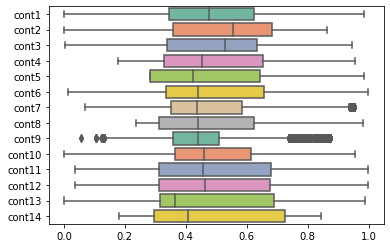

In [23]:
ax = sns.boxplot(data=train_data[continuous_columns], orient="h", palette="Set2")

## visualize dependent variable

/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loss', ylabel='Density'>

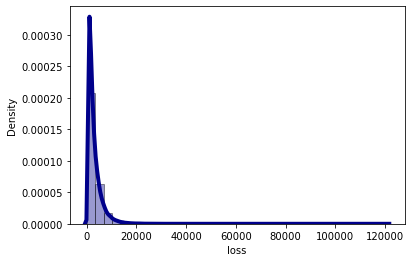

In [24]:
#Visualizing the distribution of loss value
# Density Plot and Histogram of loss
sns.distplot(train_data['loss'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [25]:
#We will use a log transformation on the dependent variable to reduce the scale
train_data['loss']=np.log(train_data['loss'])

/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loss', ylabel='Density'>

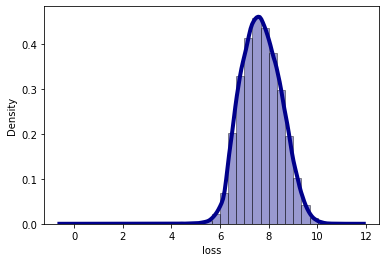

In [26]:
# Visualizing the distribution of loss value
# Density Plot and Histogram of loss
sns.distplot(train_data['loss'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

/Users/arissa/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loss', ylabel='Density'>

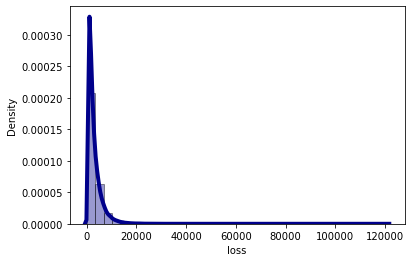

In [27]:
#taking a anti-log to transform the variable back to its original scale
sns.distplot(np.exp(train_data['loss']), hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

##### Feature elimination techniques for continuous and categorical features

In [ ]:
# if we eliminate some features, that will be easier to interpret the model
# model will also be easier 


In [ ]:
# 这个def 是非常全面的晒选features
# this function is comprehensively screening numeric variables, we can use it in many projcts 
# Feature selector that removes all low-variance features.
# 我们要去掉low variance的 numeric variable
# Default Value of Threshold is 0 # If Variance Threshold = 0 (Remove Constant Features )
# If Variance Threshold > 0 (Remove Quasi-Constant Features )


In [33]:
def feature_selection_numerical_variables(train_data,qthreshold,corr_threshold,exclude_numerical_cols_list):

    num_colums = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numerical_columns=list(train_data.select_dtypes(include=num_colums).columns)
    numerical_columns=[column for column in numerical_columns if column not in exclude_numerical_cols_list]
    
    
    # remove variable with constant variance
    constant_filter=VarianceThreshold(threshold=0)
    constant_filter.fit(train_data[numerical_columns])
    constant_columns = [column for column in train_data[numerical_columns].columns 
                    if column not in train_data[numerical_columns].columns[constant_filter.get_support()]]    
    if len(constant_columns)>0:
        train_data.drop(labels=constant_columns, axis=1, inplace=True)
     # remove deleted columns from dataframe
    
    numerical_columns=[column for column in numerical_columns if column not in constant_columns]
    #remove variables with qconstant variance
    #Remove quasi-constant variables
    qconstant_filter = VarianceThreshold(threshold=qthreshold)
    qconstant_filter.fit(train_data[numerical_columns])
    qconstant_columns=[column for column in train_data[numerical_columns].columns 
                         if column not in train_data[numerical_columns].columns[constant_filter.get_support()]]
    if len(qconstant_columns)>0:
        train_data.drop(labels=qconstant_columns, axis=1, inplace=True)
    
    # remove deleted columns from dataframe 
    numerical_columns = [column for column in numerical_columns if column not in qconstant_columns]

     #remove correlated variables
        
    correlated_features=set()
    correlation_matrix=train_data[numerical_columns].corr()
    ax=sns.heatmap(correlation_matrix, vmin=-1, vmax=1, center=0,
                  cmap=sns.diverging_palette(20,220,n=200),square=True)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');
    
    for i in range(len(correlation_matrix.columns)):
        
        for j in range(i):
            if abs(correlation_matrix.iloc[i,j])>corr_threshold:
                colname=correlation_matrix.columns[i]
                colcompared=correlation_matrix.columns[j]
                
                #check if the column compared against is not in the columns excluded list
                
                if colcompared not in correlated_features:
                    correlated_features.add(colname)
    
    train_data.drop(labels=correlated_features, axis=1, inplace=True)
    
    return train_data,constant_columns,qconstant_columns,correlated_features
    


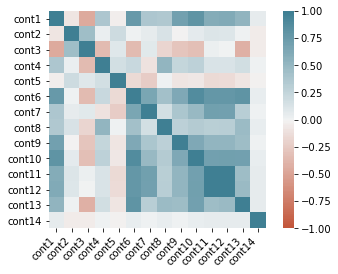

In [34]:
train_data,constant_columns,qconstant_columns,correlated_features =feature_selection_numerical_variables(train_data,0.01,0.75,['loss','id'],)

In [35]:
correlated_features

{'cont10', 'cont12', 'cont6'}

In [37]:
constant_columns

[]

In [38]:
qconstant_columns

[]

##### Handling correlation between categorical variables

In [43]:
#
# from sklearn.preprocessing import LabelEncoder
# label encoder is to create categorical variable to 1,2,3,4 .. similar to ordinal variable
# one hot coding is to create dummies 

In [45]:
# save the encoders to disk to be fitted on test data
for cf1 in categorical_columns:
    le=LabelEncoder()
    le.fit(train_data[cf1].unique())
    filename=cf1+". sav"
    pickle.dump(le, open(filename, 'wb'))
    train_data[cf1]=le.transform(train_data[cf1])

In [47]:
train_data[categorical_columns]

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116
0,0,1,0,1,0,0,0,0,1,0,...,9,6,45,28,2,19,55,0,14,269
1,0,1,0,0,0,0,0,0,1,1,...,10,10,33,65,0,22,38,0,14,85
2,0,1,0,0,1,0,0,0,1,1,...,5,0,2,85,0,28,5,0,8,153
3,1,1,0,1,0,0,0,0,1,0,...,10,10,33,67,2,39,4,0,14,79
4,0,1,0,1,0,0,0,0,1,1,...,6,1,66,50,2,50,38,0,10,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,0,1,0,0,0,0,0,0,1,0,...,6,1,33,106,0,32,38,0,11,55
188314,0,0,0,0,0,1,0,0,0,0,...,5,1,33,44,0,22,20,4,9,75
188315,0,1,0,0,0,0,0,1,1,0,...,5,1,33,87,0,48,5,0,10,79
188316,0,1,0,0,0,0,0,0,1,1,...,9,10,33,9,0,19,9,0,14,295


In [60]:
# calculate the unique values with a categorical columns

train_data[categorical_columns].nunique()

cat1        2
cat2        2
cat3        2
cat4        2
cat5        2
         ... 
cat112     51
cat113     61
cat114     19
cat115     23
cat116    326
Length: 116, dtype: int64

In [50]:
# calculate the unique values with a categorical column 
df=pd.DataFrame(columns=["Column_Name","Count"])
for cat in categorical_columns:
    unique_value_count=len(train_data[cat].unique())
    df=df.append({"Column_Name": cat, "Count": int(unique_value_count)}, ignore_index=True)
    
columns_unique_value=np.array(df.Count.value_counts().index)

In [51]:
columns_unique_value

array([  2,   4,   3,   7,   5,   8,  20,  19,  17,  16,   9, 326,  84,
        11,  61,  13,  15,  51,  23, 131])

In [63]:
df

,Column_Name,Count
0,cat1,2
1,cat2,2
2,cat3,2
3,cat4,2
4,cat5,2
...,...,...
111,cat112,51
112,cat113,61
113,cat114,19
114,cat115,23


In [140]:
#snippet to identify the dependent/correlated categorical variables and drop them
columns_to_drop_cat = set()
correlated_columns = dict()
for unique_value_count in columns_unique_value:
    if unique_value_count>1:
        categorical_columns = df.loc[df.Count==unique_value_count,'Column_Name']
        categorical_columns = categorical_columns.reset_index(drop=True)
        columns_length=len(categorical_columns)
        for col in range(columns_length-1):
            column_to_compare = categorical_columns[col]
            columns_compare_against = categorical_columns[(col+1):columns_length]
            chi_scores = chi2(train_data[columns_compare_against],train_data[column_to_compare])

            if column_to_compare not in columns_to_drop_cat:
                columns_to_be_dropped = [i for i in range(len(columns_compare_against)) if chi_scores[1][i]<=0.05]
                columns_to_drop_array = np.array(columns_compare_against)[columns_to_be_dropped]
                correlated_columns[column_to_compare]=columns_to_drop_array
                columns_to_drop_cat.update(columns_to_drop_array)

In [141]:
train_data = train_data.drop(columns_to_drop_cat,axis=1)

In [142]:
train_data

,id,cat1,cat15,cat22,cat32,cat73,cat75,cat77,cat88,cat89,...,cont3,cont4,cont5,cont7,cont8,cont9,cont11,cont13,cont14,loss
0,1,0,0,0,0,0,1,3,0,0,...,0.187583,0.789639,0.310061,0.335060,0.30260,0.67135,0.569745,0.822493,0.714843,7.702186
1,2,0,0,0,0,0,0,3,0,0,...,0.592681,0.614134,0.885834,0.436585,0.60087,0.35127,0.338312,0.611431,0.304496,7.157424
2,5,0,0,0,0,0,0,3,0,0,...,0.484196,0.236924,0.397069,0.315545,0.27320,0.26076,0.381398,0.195709,0.774425,8.008063
3,10,1,0,0,0,1,0,3,0,0,...,0.527991,0.373816,0.422268,0.391128,0.31796,0.32128,0.327915,0.605077,0.602642,6.845720
4,11,0,0,0,0,0,0,3,0,0,...,0.527991,0.473202,0.704268,0.247408,0.24564,0.22089,0.204687,0.246011,0.432606,7.924380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,587620,0,0,0,0,1,0,3,0,0,...,0.613660,0.473202,0.939556,0.289949,0.24564,0.30859,0.223038,0.333292,0.208216,7.088926
188314,587624,0,0,0,0,0,0,3,0,0,...,0.549770,0.802892,0.704268,0.382000,0.63475,0.40455,0.307628,0.318646,0.305872,7.010619
188315,587630,0,0,0,0,0,0,3,0,0,...,0.792378,0.189137,0.482436,0.370534,0.24564,0.45808,0.445614,0.339244,0.503888,8.659151
188316,587632,0,0,0,0,0,1,3,0,0,...,0.298977,0.383428,0.340543,0.562866,0.34987,0.44767,0.863052,0.654753,0.721707,7.354279


In [143]:
correlated_features = list(correlated_features)
correlated_features

['cont6', 'cont10', 'cont12']

In [ ]:
# p<0.05 means the two variables are significantly correlated, so we can drop 

In [144]:
columns_to_drop_cat = list(columns_to_drop_cat)
columns_to_drop_cat

['cat80',
 'cat45',
 'cat12',
 'cat21',
 'cat5',
 'cat2',
 'cat107',
 'cat47',
 'cat4',
 'cat54',
 'cat34',
 'cat82',
 'cat72',
 'cat63',
 'cat53',
 'cat61',
 'cat38',
 'cat25',
 'cat58',
 'cat14',
 'cat27',
 'cat26',
 'cat3',
 'cat48',
 'cat70',
 'cat64',
 'cat43',
 'cat79',
 'cat8',
 'cat13',
 'cat59',
 'cat44',
 'cat39',
 'cat67',
 'cat92',
 'cat81',
 'cat71',
 'cat68',
 'cat24',
 'cat23',
 'cat35',
 'cat62',
 'cat16',
 'cat49',
 'cat85',
 'cat111',
 'cat46',
 'cat91',
 'cat51',
 'cat41',
 'cat50',
 'cat76',
 'cat97',
 'cat106',
 'cat31',
 'cat28',
 'cat36',
 'cat98',
 'cat18',
 'cat86',
 'cat78',
 'cat9',
 'cat10',
 'cat19',
 'cat42',
 'cat6',
 'cat74',
 'cat84',
 'cat20',
 'cat66',
 'cat114',
 'cat33',
 'cat65',
 'cat57',
 'cat40',
 'cat7',
 'cat83',
 'cat55',
 'cat11',
 'cat56',
 'cat69',
 'cat60',
 'cat37',
 'cat17',
 'cat30',
 'cat52',
 'cat87',
 'cat29']

In [146]:
columns_to_drop_cat.extend(correlated_features)
columns_to_drop = columns_to_drop_cat.copy()

##### Fit an ML Model


In [147]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [150]:
Column_datatypes= train_data.dtypes
Integer_columns=list(Column_datatypes.where(lambda x:x=="int64").dropna().index.values)
train_data[Integer_columns] = train_data[Integer_columns].astype('category',copy=False)


In [151]:
train_data[Integer_columns] 

,id,cat1,cat15,cat22,cat32,cat73,cat75,cat77,cat88,cat89,...,cat103,cat104,cat105,cat108,cat109,cat110,cat112,cat113,cat115,cat116
0,1,0,0,0,0,0,1,3,0,0,...,0,8,4,6,45,28,19,55,14,269
1,2,0,0,0,0,0,0,3,0,0,...,0,4,4,10,33,65,22,38,14,85
2,5,0,0,0,0,0,0,3,0,0,...,1,4,5,0,2,85,28,5,8,153
3,10,1,0,0,0,1,0,3,0,0,...,0,4,4,10,33,67,39,4,14,79
4,11,0,0,0,0,0,0,3,0,0,...,0,3,4,1,66,50,50,38,10,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,587620,0,0,0,0,1,0,3,0,0,...,0,3,4,1,33,106,32,38,11,55
188314,587624,0,0,0,0,0,0,3,0,0,...,0,4,4,1,33,44,22,20,9,75
188315,587630,0,0,0,0,0,0,3,0,0,...,0,4,5,1,33,87,48,5,10,79
188316,587632,0,0,0,0,0,1,3,0,0,...,0,10,6,10,33,9,19,9,14,295


In [153]:
train_data.dtypes

id        category
cat1      category
cat15     category
cat22     category
cat32     category
cat73     category
cat75     category
cat77     category
cat88     category
cat89     category
cat90     category
cat93     category
cat94     category
cat95     category
cat96     category
cat99     category
cat100    category
cat101    category
cat102    category
cat103    category
cat104    category
cat105    category
cat108    category
cat109    category
cat110    category
cat112    category
cat113    category
cat115    category
cat116    category
cont1      float64
cont2      float64
cont3      float64
cont4      float64
cont5      float64
cont7      float64
cont8      float64
cont9      float64
cont11     float64
cont13     float64
cont14     float64
loss       float64
dtype: object

In [154]:
X=train_data.drop(['loss','id'],axis=1)

In [155]:
X

,cat1,cat15,cat22,cat32,cat73,cat75,cat77,cat88,cat89,cat90,...,cont2,cont3,cont4,cont5,cont7,cont8,cont9,cont11,cont13,cont14
0,0,0,0,0,0,1,3,0,0,0,...,0.245921,0.187583,0.789639,0.310061,0.335060,0.30260,0.67135,0.569745,0.822493,0.714843
1,0,0,0,0,0,0,3,0,0,0,...,0.737068,0.592681,0.614134,0.885834,0.436585,0.60087,0.35127,0.338312,0.611431,0.304496
2,0,0,0,0,0,0,3,0,0,0,...,0.358319,0.484196,0.236924,0.397069,0.315545,0.27320,0.26076,0.381398,0.195709,0.774425
3,1,0,0,0,1,0,3,0,0,0,...,0.555782,0.527991,0.373816,0.422268,0.391128,0.31796,0.32128,0.327915,0.605077,0.602642
4,0,0,0,0,0,0,3,0,0,0,...,0.159990,0.527991,0.473202,0.704268,0.247408,0.24564,0.22089,0.204687,0.246011,0.432606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,0,0,0,0,1,0,3,0,0,0,...,0.785784,0.613660,0.473202,0.939556,0.289949,0.24564,0.30859,0.223038,0.333292,0.208216
188314,0,0,0,0,0,0,3,0,0,0,...,0.555782,0.549770,0.802892,0.704268,0.382000,0.63475,0.40455,0.307628,0.318646,0.305872
188315,0,0,0,0,0,0,3,0,0,0,...,0.785784,0.792378,0.189137,0.482436,0.370534,0.24564,0.45808,0.445614,0.339244,0.503888
188316,0,0,0,0,0,1,3,0,0,0,...,0.422197,0.298977,0.383428,0.340543,0.562866,0.34987,0.44767,0.863052,0.654753,0.721707


In [156]:
y=train_data['loss']

In [157]:
y

0         7.702186
1         7.157424
2         8.008063
3         6.845720
4         7.924380
            ...   
188313    7.088926
188314    7.010619
188315    8.659151
188316    7.354279
188317    8.466262
Name: loss, Length: 188318, dtype: float64

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [159]:
# Instantiate model with 100 decision trees
rf_base = RandomForestRegressor(n_estimators = 100, random_state = 42,oob_score = True)
rf_base.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=42)

In [162]:
Y_test_predict_base = rf_base.predict(X_test)
print("Base model accuracy:",np.sqrt(mean_squared_error(y_test, Y_test_predict_base)))

Base model accuracy: 0.6665118259641727


###### HyperParameter Tuning Using RandomSearchCV

In [163]:
#number of trees
n_estimators = [100,200,300,400,500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# Minimum number of samples required to split a node
min_samples_split = [200,400,600]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [164]:
# Use the random grid to search for best hyperparameters
# base model to tune
rf = RandomForestRegressor()

# 5 fold cross validation, 
# search across 150 different combinations, and use all available cores
rf_tuned = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3,n_iter = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_tuned.fit(X_train, y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [200, 400, 600],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [165]:
# Use the random grid to search for best hyperparameters
# base model to tune
rf = RandomForestRegressor()

# 5 fold cross validation, 
# search across 150 different combinations, and use all available cores
rf_tuned = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3,n_iter = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_tuned.fit(X_train, y_train)

#save the model output
pickle.dump(rf_tuned, open("tunedmodel_rf", 'wb'))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [166]:
rf_tuned.best_params_

{'n_estimators': 200,
 'min_samples_split': 200,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [167]:
#load the saved model and predict on the test data
tunedmodel_rf = pickle.load(open("tunedmodel_rf", 'rb'))

Y_test_predict_tuned = tunedmodel_rf.predict(X_test)
print("Tuned model accuracy:",np.sqrt(mean_squared_error(y_test, Y_test_predict_tuned)))

Tuned model accuracy: 0.6528327804136538


##### fit a GBM model

In [168]:
from sklearn.ensemble import GradientBoostingRegressor  #GBM algorithm
gbm_base = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=3,
    learning_rate=1.0)

gbm_base.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

In [169]:
Y_test_predict_tuned=gbm_base.predict(X_test)

In [170]:
print("Base model GBM accuracy:",np.sqrt(mean_squared_error(y_test, Y_test_predict_tuned)))

Base model GBM accuracy: 0.7004418131911399


In [174]:
# mean squared error, the smaller, the better, so Random Forest is the best 